<p style="font-size:12px"><a href="https://www.linkedin.com/in/lu%C3%ADs-rodrigues-b13509140/" style="text-decoration:none">Luís Rodrigues</a> &copy; 2018</p>

<h1>Exploring U.S. Births</h1>
<p>Working with a dataset on births in the U.S. between 1994 and 2003, compiled by <a href="http://www.fivethirtyeight.com/" style="text-decoration:none;"><strong>FiveThirtyEight</strong></a><img src="https://media1.fdncms.com/inlander/imager/for-your-consideration/u/original/2316307/arts_culture4-2.jpg" width="25px" style="display:inline;margin-bottom: 20px;"/><br>The objective of this exercise is to practice Python while doing some basic exploratory analysis.</p>
<img src="https://motherandbaby.blob.core.windows.net/web/1/root/shutterstock-181925051_w555.jpg" width="300px" />

<h1>Index</h1> 

- Intro;
- Structuring the Data;
- Soft Exploratory Analysis/Tooling
- The Extra Mile.


<h1>Intro</h1>
<p>As you will notice, the unortodox format used in this exercise only has to do with the main objetive: praticing Python. Some simple matplotlib linear charts will be included too.<br>We will start by first peeking into the data.</p>

In [2]:
file = open("US_births_1994-2003_CDC_NCHS.csv", 'r')
data = file.read()
data_list = data.split('\n')
data_list[0:10]

['year,month,date_of_month,day_of_week,births',
 '1994,1,1,6,8096',
 '1994,1,2,7,7772',
 '1994,1,3,1,10142',
 '1994,1,4,2,11248',
 '1994,1,5,3,11053',
 '1994,1,6,4,11406',
 '1994,1,7,5,11251',
 '1994,1,8,6,8653',
 '1994,1,9,7,7910']

<h1>Structuring the Data</h1>
<p>Turning the data in the csv file into a list of lists.</p>

In [3]:
def read_csv(file_name):
    file_data = open(file_name, 'r').read().split("\n")
    string_list = file_data[1:]
    final_list = []
    for row in string_list:
        int_fields = []
        string_fields = row.split(",")
        for value in string_fields:
            int_fields.append(int(value))
        final_list.append(int_fields)
    return final_list

cdc_list = read_csv("US_births_1994-2003_CDC_NCHS.csv")
cdc_list[0:10]

[[1994, 1, 1, 6, 8096],
 [1994, 1, 2, 7, 7772],
 [1994, 1, 3, 1, 10142],
 [1994, 1, 4, 2, 11248],
 [1994, 1, 5, 3, 11053],
 [1994, 1, 6, 4, 11406],
 [1994, 1, 7, 5, 11251],
 [1994, 1, 8, 6, 8653],
 [1994, 1, 9, 7, 7910],
 [1994, 1, 10, 1, 10498]]

<h1>Soft Exploratory Analysis/Tooling</h1>
<p>While (very) softly exploring some of the data, we will be writing a few functions to help us ease and further our analysis.<br>
We are going to start by calculating the total number of births that occured in each month, across all the years in the dataset.</p>

In [4]:
def month_births(data):
    #our data argument is a list of lists format
    births_per_month = {}
    for item in data:
        month = item[1]
        births = item[4]
        if month in births_per_month:
            births_per_month[month] += births
        else:
            births_per_month[month] = births
    return births_per_month

cdc_month_births = month_births(cdc_list)
cdc_month_births

{1: 3232517,
 2: 3018140,
 3: 3322069,
 4: 3185314,
 5: 3350907,
 6: 3296530,
 7: 3498783,
 8: 3525858,
 9: 3439698,
 10: 3378814,
 11: 3171647,
 12: 3301860}

In [5]:
import matplotlib.pyplot as plt
plt.plot(cdc_month_births.keys(), cdc_month_births.values())
plt.ylabel('nr of births')
plt.xlabel('month')
plt.show()

<Figure size 640x480 with 1 Axes>

<p>As we can see, the month is a decisive factor in the total number of births, as it peaks during the Summer.<br>
Next, we are going to calculate the total number of births that occured in each unique day of the week, across all the years in the dataset.</p>

In [6]:
def dow_births(data):
    #data is a list of lists, again...
    births_per_dow = {}
    for item in data:
        dow = item[3]
        births = item[4]
        if dow in births_per_dow:
            births_per_dow[dow] += births
        else:
            births_per_dow[dow] = births
    return births_per_dow

cdc_dow_births = dow_births(cdc_list)

sorted_dow_births = []
for i in sorted(cdc_dow_births):
    sorted_dow_births.append(cdc_dow_births[i])

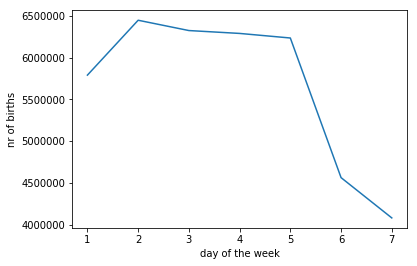

In [7]:
plt.plot(sorted(cdc_dow_births), sorted_dow_births)
plt.ylabel('nr of births')
plt.xlabel('day of the week')
plt.show()

<p style="line-height: 40px;">Most births occured on weekdays.<br>
In case you haven't noticed, the two functions we previously used in our analysis are very similar.<br>
We are going to write a general function to calculate the total births for any column in our list of lists.<br>
In the end, it will return the data in a dictionary format.</p>

In [8]:
def calc_counts(data, column):
    dictionary = {}
    for item in data:
        column_value = item[column]
        births = item[4]
        if column_value in dictionary:
            dictionary[column_value] += births
        else:
            dictionary[column_value] = births
    return dictionary

<p>Now that we have built the function, we will call it sequencially on the remaining columns, in the following order:</p>

<ul>
    <li>Total births occured in every year (1994-2003);</li>
    <li>Total births occured in each day of the month (1, 2...31);</li>
</ul>

In [9]:
cdc_year_births = calc_counts(cdc_list, 0)
cdc_year_births

{1994: 3952767,
 1995: 3899589,
 1996: 3891494,
 1997: 3880894,
 1998: 3941553,
 1999: 3959417,
 2000: 4058814,
 2001: 4025933,
 2002: 4021726,
 2003: 4089950}

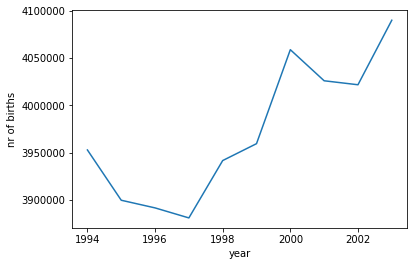

In [10]:
plt.plot(cdc_year_births.keys(), cdc_year_births.values())
plt.ylabel('nr of births')
plt.xlabel('year')
plt.show()

<p>Overall, the number of total births has been increasing rapidly since 1997.<br>
    
A <em>quick search</em> on Wikipedia shows us that during this year, for the first time since 1973, the unemployment rate was below 5% in the US, along with an exponencial economical growth (Dow Jones had doubled it's value in just 2.5 years), which might have motivativated the shown increase.</p>

In [11]:
cdc_dom_births = calc_counts(cdc_list, 2)
cdc_dom_births

{1: 1276557,
 2: 1288739,
 3: 1304499,
 4: 1288154,
 5: 1299953,
 6: 1304474,
 7: 1310459,
 8: 1312297,
 9: 1303292,
 10: 1320764,
 11: 1314361,
 12: 1318437,
 13: 1277684,
 14: 1320153,
 15: 1319171,
 16: 1315192,
 17: 1324953,
 18: 1326855,
 19: 1318727,
 20: 1324821,
 21: 1322897,
 22: 1317381,
 23: 1293290,
 24: 1288083,
 25: 1272116,
 26: 1284796,
 27: 1294395,
 28: 1307685,
 29: 1223161,
 30: 1202095,
 31: 746696}

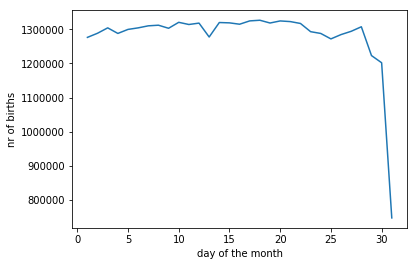

In [12]:
plt.plot(cdc_dom_births.keys(), cdc_dom_births.values())
plt.ylabel('nr of births')
plt.xlabel('day of the month')
plt.show()

<p style="line-height:25px">Across the years, the total number of births doesn't seem to be affected by the date of the month. </p>
<p>8 out of 12 months have 31 days, which might explain the decrease shown at this paticular time of the month.</p>

<h1>The Extra Mile</h1>
    <p>This part includes two generic functions which make it easier to explore the data.
    <br>The function below will return the birth values across years that share the same information parameter.<br>
For example, it would be interesting to see how births on a Saturday have changed between a certain time period, in years.</p>

5 {1999: 449985, 2000: 469794, 2001: 453928, 2002: 445770, 2003: 447445}


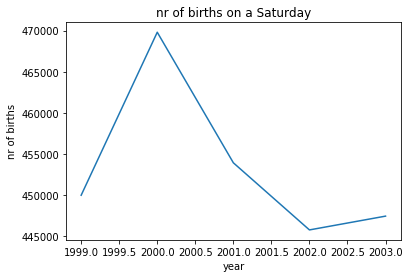

In [17]:
def filter_data(column, value, start_year=1994, end_year=2003):
    data_to_compare = {}
    for row in cdc_list:
        time = row[0]
        births_value = row[4]
        search_value = row[column]
        if check_date(start_year, end_year, time) and search_value == value:
            if time in data_to_compare:
                data_to_compare[time] += births_value
            else:
                data_to_compare[time] = births_value
    return data_to_compare

#auxiliary functions
def check_date(start_date, end_date, date):
    if date >= start_date and date <= end_date:
        return True
    else:
        return False

#example
example_filtering = filter_data(3, 6, 1999, 2003)
print(len(example_filtering), example_filtering)

plt.plot(example_filtering.keys(), example_filtering.values())
plt.ylabel('nr of births')
plt.xlabel('year')
plt.title('nr of births on a Saturday')
plt.show()

<p>The last one will calculate the minimum, maximum, and average birth values in a dictionary.</p>

In [14]:
def stats(dict_data):
    values = []
    min_max_dict = {}
    for key in dict_data.keys():
        values.append(dict_data[key])
    values.sort()
    
    min_max_dict["min"] = values[0]
    min_max_dict["max"] = values[len(values) - 1]
    
    v_sum = 0
    for value in values:
        v_sum += value
    min_max_dict["avg"] = round(v_sum / len(values))    
        
    return min_max_dict

#example
stats_dow_births = stats(cdc_dow_births)
stats_dow_births

{'min': 4079723, 'max': 6446196, 'avg': 5674591}